## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Modelos de Machine Learning
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Evaluación del modelo
from sklearn.metrics import mean_squared_error

# Manejo de archivos para Kaggle
import os


## Datos

In [2]:
# Cargar los datasets
train_path = "C:\\Users\\mario\\Documents\\GitHub\\ONLINE_DS_THEBRIDGE_27MarioGomez\\Masterclass\\Kaggle\\data\\train.csv"


train_df = pd.read_csv(train_path)


# Verificar que se cargaron correctamente
print("Train dataset shape:", train_df.shape)


Train dataset shape: (912, 13)


## Exploración de los datos

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [4]:
train_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [5]:
train_df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
907,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
908,1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
909,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
910,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
911,229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [6]:
train_df.describe()

,laptop_ID,Inches,Price_in_euros
count,912.000000,912.000000,912.000000
mean,650.312500,14.981579,1111.724090
std,382.727748,1.436719,687.959172
min,2.000000,10.100000,174.000000
25%,324.750000,14.000000,589.000000
50%,636.500000,15.600000,978.000000
75%,982.250000,15.600000,1483.942500
max,1320.000000,18.400000,6099.000000


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [7]:
# Función para preprocesar los datos
def preprocess_data(df):
    df = df.copy()  # Crear una copia para evitar modificar el original

    # Convertir "Ram" a número entero (eliminar "GB" y convertir a int)
    df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)
    
    # Convertir "Weight" a número flotante (eliminar "kg" y convertir a float)
    df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)
    
    # Extraer información de la resolución de pantalla
    df["ScreenResolution"] = df["ScreenResolution"].str.replace(" ", "").str.lower()
    df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "touchscreen" in x else 0)
    df["IPS"] = df["ScreenResolution"].apply(lambda x: 1 if "ips" in x else 0)
    df["Resolution_X"] = df["ScreenResolution"].str.extract(r'(\d+)x(\d+)')[0].astype(float)
    df["Resolution_Y"] = df["ScreenResolution"].str.extract(r'(\d+)x(\d+)')[1].astype(float)
    df["TotalPixels"] = df["Resolution_X"] * df["Resolution_Y"]

    # Extraer información del CPU (marca y velocidad)
    df["Cpu_Brand"] = df["Cpu"].apply(lambda x: x.split()[0])  # Intel, AMD, etc.
    df["Cpu_Speed"] = df["Cpu"].apply(lambda x: float(x.split()[-1][:-3]) if x.split()[-1][-3:] == "GHz" else None)
    
    # Extraer información del GPU (marca)
    df["Gpu_Brand"] = df["Gpu"].apply(lambda x: x.split()[0])  # Nvidia, Intel, AMD, etc.

    # Procesar memoria (HDD, SSD, Flash Storage)
    df["HDD"] = df["Memory"].apply(lambda x: 1 if "HDD" in x else 0)
    df["SSD"] = df["Memory"].apply(lambda x: 1 if "SSD" in x else 0)
    df["Flash_Storage"] = df["Memory"].apply(lambda x: 1 if "Flash" in x else 0)

    # Categorizar sistemas operativos
    def categorize_os(os):
        if "windows" in os.lower():
            return "Windows"
        elif "mac" in os.lower():
            return "Mac"
        elif "linux" in os.lower():
            return "Linux"
        else:
            return "Other"
    
    df["OpSys"] = df["OpSys"].apply(categorize_os)

    # Eliminar columnas innecesarias
    df.drop(columns=["Product", "ScreenResolution", "Cpu", "Gpu", "Memory"], inplace=True)
    
    return df

# Aplicar preprocesamiento al dataset de entrenamiento
train_processed = preprocess_data(train_df)

# Ver las primeras filas para verificar los cambios
train_processed.head()


,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_in_euros,Touchscreen,IPS,Resolution_X,Resolution_Y,TotalPixels,Cpu_Brand,Cpu_Speed,Gpu_Brand,HDD,SSD,Flash_Storage
0,755,HP,Notebook,15.6,8,Windows,1.86,539.00,0,0,1920.0,1080.0,2073600.0,Intel,2.0,Intel,0,1,0
1,618,Dell,Gaming,15.6,16,Windows,2.59,879.01,0,0,1920.0,1080.0,2073600.0,Intel,2.6,Nvidia,1,0,0
2,909,HP,Notebook,15.6,8,Windows,2.04,900.00,0,0,1920.0,1080.0,2073600.0,Intel,2.7,Nvidia,1,0,0
3,2,Apple,Ultrabook,13.3,8,Mac,1.34,898.94,0,0,1440.0,900.0,1296000.0,Intel,1.8,Intel,0,0,1
4,286,Dell,Notebook,15.6,4,Linux,2.25,428.00,0,0,1920.0,1080.0,2073600.0,Intel,2.0,AMD,1,0,0


-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [8]:
# Definir X (features) y y (target)
X = train_processed.drop(columns=["Price_in_euros", "laptop_ID"])  # Eliminamos el target y el ID
y = train_processed["Price_in_euros"]

# Verificar dimensiones
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (912, 17)
Shape de y: (912,)


In [9]:
X.shape

(912, 17)

In [10]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [11]:
# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar tamaños
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (729, 17)
X_test: (183, 17)
y_train: (729,)
y_test: (183,)


In [12]:
X_train

,Company,TypeName,Inches,Ram,OpSys,Weight,Touchscreen,IPS,Resolution_X,Resolution_Y,TotalPixels,Cpu_Brand,Cpu_Speed,Gpu_Brand,HDD,SSD,Flash_Storage
25,HP,Workstation,17.3,8,Windows,3.00,0,1,1920.0,1080.0,2073600.0,Intel,2.6,AMD,1,0,0
84,Dell,Gaming,15.6,16,Windows,2.56,0,0,1920.0,1080.0,2073600.0,Intel,2.8,Nvidia,0,1,0
10,Apple,Ultrabook,13.3,8,Mac,1.37,0,1,2560.0,1600.0,4096000.0,Intel,2.9,Intel,0,1,0
342,HP,Notebook,14.0,4,Windows,1.54,0,0,1920.0,1080.0,2073600.0,Intel,2.3,Intel,1,0,0
890,Dell,Notebook,17.3,16,Windows,2.80,0,0,1920.0,1080.0,2073600.0,Intel,1.8,AMD,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,HP,Notebook,14.0,8,Windows,1.94,0,0,1366.0,768.0,1049088.0,Intel,1.6,Intel,1,0,0
270,Lenovo,Notebook,15.6,6,Windows,2.20,0,0,1920.0,1080.0,2073600.0,AMD,3.6,AMD,0,1,0
860,Dell,Ultrabook,12.5,16,Windows,1.18,0,0,1920.0,1080.0,2073600.0,Intel,2.8,Intel,0,1,0
435,Lenovo,Notebook,15.6,4,Windows,2.20,0,0,1366.0,768.0,1049088.0,Intel,1.1,Intel,1,0,0


In [13]:
y_train

25     2899.00
84     1249.26
10     1958.90
342    1030.99
890    1396.00
        ...   
106     389.00
270     549.00
860    1859.00
435     306.00
102    1943.00
Name: Price_in_euros, Length: 729, dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder

# Identificar columnas categóricas
categorical_columns = ["Company", "TypeName", "OpSys", "Cpu_Brand", "Gpu_Brand"]

# Aplicar LabelEncoder a cada columna categórica
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    
    # Ajustar el encoder con todas las categorías posibles de train y test
    le.fit(pd.concat([X_train[col], X_test[col]], axis=0))
    
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
    label_encoders[col] = le  # Guardar el encoder por si es necesario luego

# Verificar que ahora son numéricas
print(X_train.dtypes)



Company            int32
TypeName           int32
Inches           float64
Ram                int32
OpSys              int32
Weight           float64
Touchscreen        int64
IPS                int64
Resolution_X     float64
Resolution_Y     float64
TotalPixels      float64
Cpu_Brand          int32
Cpu_Speed        float64
Gpu_Brand          int32
HDD                int64
SSD                int64
Flash_Storage      int64
dtype: object


### 3. Baseline de modelos


In [15]:
# Entrenar el modelo base (Random Forest)
rf_model = RandomForestRegressor(
    n_estimators=300,  # Más árboles para mejor generalización
    max_depth=15,  # Controlar la profundidad para evitar overfitting
    min_samples_split=5,  # Evitar sobreajuste en hojas pequeñas
    min_samples_leaf=3,  # Asegurar que cada hoja tiene suficientes datos
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles para mayor eficiencia
)

rf_model.fit(X_train, y_train)
print(rf_model)

# Realizar predicciones en el test set
y_pred = rf_model.predict(X_test)


RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

RMSE del modelo base (Random Forest optimizado): 348.3270124430783
      Actual    Predicted
649  1099.00  1197.193758
761   959.00  1063.912639
545   857.07  1296.846993
367   699.00   769.937325
361   369.00   361.524264


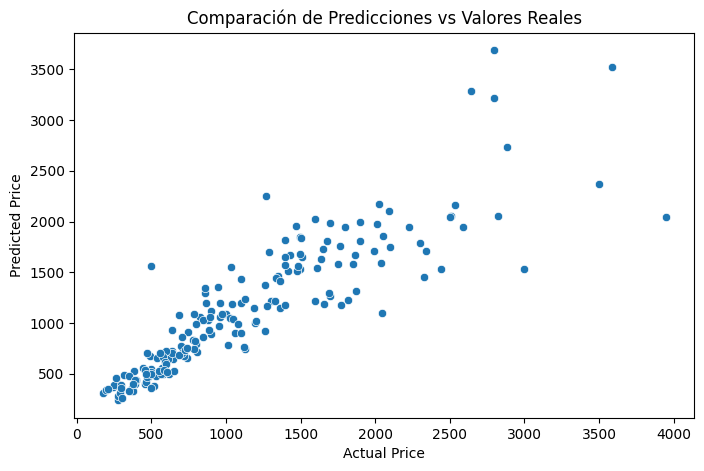

In [16]:
# Evaluar el modelo con RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE del modelo base (Random Forest optimizado):", rmse)

# Mostrar las primeras predicciones vs valores reales
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison_df.head())

# Gráfica de valores reales vs predichos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Comparación de Predicciones vs Valores Reales")
plt.show()


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [17]:
# Cargar los datos de test
X_pred = pd.read_csv("C:/Users/mario/Documents/GitHub/ONLINE_DS_THEBRIDGE_27MarioGomez/Masterclass/Kaggle/data/test.csv")

# Primer vistazo al dataset
X_pred.head()



,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [18]:
X_pred.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
386,820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
387,948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
388,483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
389,1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
390,421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [19]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [20]:
# Aplicar preprocesamiento al dataset de test
X_pred_processed = preprocess_data(X_pred)

# Aplicar LabelEncoder con los mismos valores usados en train
for col in categorical_columns:
    if col in label_encoders:
        le = label_encoders[col]
        X_pred_processed[col] = X_pred_processed[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Revisar los cambios en el dataset procesado
X_pred_processed.head()


,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Touchscreen,IPS,Resolution_X,Resolution_Y,TotalPixels,Cpu_Brand,Cpu_Speed,Gpu_Brand,HDD,SSD,Flash_Storage
0,209,10,1,15.6,16,2,2.400,0,0,1920.0,1080.0,2073600.0,1,2.8,2,0,1,0
1,1281,0,3,15.6,4,0,2.400,0,0,1366.0,768.0,1049088.0,1,1.6,1,1,0,0
2,1168,10,3,15.6,4,2,1.900,0,0,1366.0,768.0,1049088.0,1,2.0,1,1,0,0
3,1231,4,0,15.6,8,3,2.191,1,1,1920.0,1080.0,2073600.0,1,2.5,1,0,1,0
4,1020,7,3,14.0,4,3,1.950,0,0,1920.0,1080.0,2073600.0,1,2.5,1,0,1,0


In [21]:
# Verificar diferencias en columnas
set(X_train.columns) - set(X_pred_processed.columns), set(X_pred_processed.columns) - set(X_train.columns)


(set(), {'laptop_ID'})

In [22]:
X_pred_processed = X_pred_processed.drop(columns=["laptop_ID"])

In [23]:
predictions_submit = rf_model.predict(X_pred_processed)
predictions_submit


array([1519.95551641,  317.82918734,  398.53640348, 1074.21409966,
        919.76832877,  535.98278224,  843.92668483, 1001.07250592,
       1464.99741009,  387.71979717, 2577.27778642, 1345.48816644,
        511.33805635, 1520.40280865,  730.51641304,  639.85780723,
       1649.25577786, 1304.09722298, 1828.48328845,  675.02612219,
       1409.1255997 ,  364.61834561,  662.28551571, 1077.43224574,
        519.75744531,  745.85772966,  553.85213132,  441.27666909,
       2368.14752233, 1138.28013841, 2120.95991042,  463.60870305,
        714.09342694, 3472.68928368, 2111.63876896, 1895.9898723 ,
        663.26330021, 1225.54318988,  894.19985375, 1627.5001109 ,
        495.33376759,  966.66490104,  526.69014692, 1161.51627275,
       1411.14488194, 1092.2025133 , 1145.27320885,  607.91175444,
        818.10152637,  454.9075819 , 2022.09180267,  746.90859267,
       1183.40696398,  598.84753241, 1845.29930762, 1888.01646571,
        647.27548837,  902.67766143,  924.26732436,  561.58853

True
247.13323550986053 3796.2113794773777
174.0 6099.0


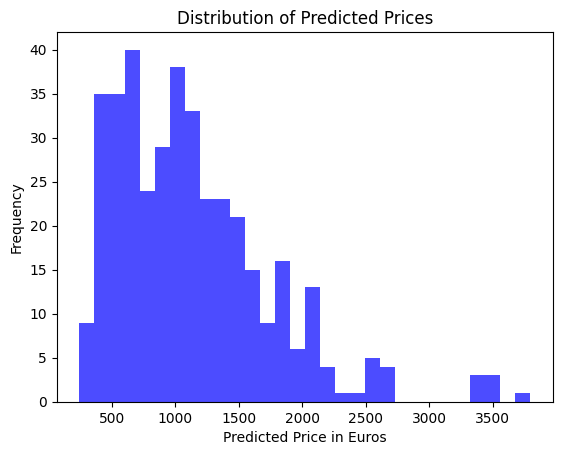

In [24]:
# Comprobaciones finales
print(len(predictions_submit) == X_pred_processed.shape[0])

# ¿Tienen sentido en comparación con el target del train dataset?
print(predictions_submit.min(), predictions_submit.max())
print(train_df["Price_in_euros"].min(), train_df["Price_in_euros"].max())

# Nos ayudamos de un histograma
plt.hist(predictions_submit, bins=30, alpha=0.7, color='blue')
plt.xlabel("Predicted Price in Euros")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Prices")
plt.show()


**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [25]:
# ¿Qué opináis?
# ¿Sí, no?

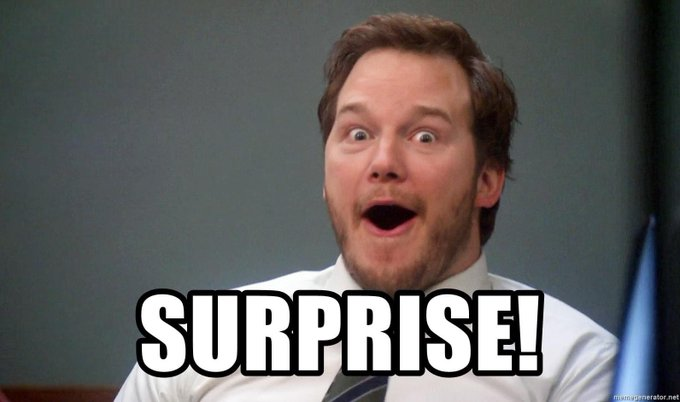

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [26]:
# Cargar el archivo sample_submission.csv
sample = pd.read_csv("C:/Users/mario/Documents/GitHub/ONLINE_DS_THEBRIDGE_27MarioGomez/Masterclass/Kaggle/data/sample_submission.csv")

# Mostrar las primeras filas para verificar la estructura
sample.head()


,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [27]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [28]:
# Crear el DataFrame de submission con las predicciones
submission = pd.DataFrame({
    "laptop_ID": X_pred["laptop_ID"],  # Mantener el mismo identificador de laptop
    "Price_in_euros": predictions_submit  # Nuestras predicciones
})

# Revisar las primeras filas para verificar la estructura
submission.head()

,laptop_ID,Price_in_euros
0,209,1519.955516
1,1281,317.829187
2,1168,398.536403
3,1231,1074.214100
4,1020,919.768329


In [29]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [30]:
print(sample.columns)

Index(['laptop_ID', 'Price_in_euros'], dtype='object')


In [34]:
print(submission.columns)

Index(['laptop_ID', 'Price_in_euros'], dtype='object')


In [ ]:
import urllib.request
from PIL import Image  # Para abrir la imagen

In [36]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [37]:
chequeador(submission)


You're ready to submit!
